<a href="https://colab.research.google.com/drive/1a0iv5Atu64A4hqjNLbtvklu2oX1SaK0s?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Install the required packages

In [2]:
!pip install lmfit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 KB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 KB 10.1 MB/s eta 0:00:00


#Import the required packages

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from lmfit.models import PolynomialModel
from lmfit.models import ExpressionModel

#Load Hubble parameter dataset

In [4]:
x, y, yerr = np.loadtxt ('https://raw.githubusercontent.com/darshanbeniwal/Astro_data_analysis_w_Python_GHRCE_IUCCA_2023/main/DataFiles/H_30.txt', unpack=True)


#Run lmfit package

In [5]:
mod = ExpressionModel('(h0*((1+x)**3*om+1-om)**0.5)')
pars = mod.make_params(h0=0, om=0)
result = mod.fit(y, pars, x=x, weights=1.0/yerr)

##Print results

In [6]:
print(result.fit_report())

[[Model]]
    Model(_eval)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 19
    # data points      = 30
    # variables        = 2
    chi-square         = 14.5159394
    reduced chi-square = 0.51842641
    Akaike info crit   = -17.7785021
    Bayesian info crit = -14.9761073
    R-squared          = 0.99966988
[[Variables]]
    h0:  68.1571898 +/- 2.21643030 (3.25%) (init = 0)
    om:  0.31948550 +/- 0.04268981 (13.36%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(h0, om) = -0.8609


##Plot Hubble parameter best fit curve

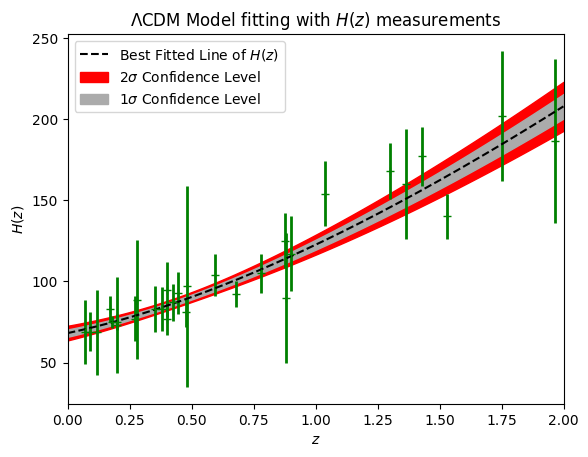

In [10]:
xfine = np.arange(0,2,0.001)
ypred = result.eval(x=xfine)
dely = result.eval_uncertainty(x=xfine, sigma=1)
plt.cla()
plt.errorbar(x, y, yerr, linewidth=2, color='g', ls='none', mfc='r', marker='+', markersize=6)
plt.plot(xfine, ypred, 'k--',label='Best Fitted Line of $H(z)$')
plt.fill_between(xfine, ypred-2*dely, ypred+2*dely, color="r",label="$2\sigma$ Confidence Level")
plt.fill_between(xfine, ypred-dely, ypred+dely, color="#ABABAB",label="$1\sigma$ Confidence Level")
plt.title('$\Lambda$CDM Model fitting with $H(z)$ measurements')
plt.xlim(0,2)
plt.grid(False)
plt.xlabel('$z$')
plt.ylabel('$H(z)$')
plt.legend(loc="upper left")

##Save Final Output

In [11]:
plt.savefig('LCDM_model_fit_H_u_lmfit.pdf', format='pdf', dpi=1200)


<Figure size 640x480 with 0 Axes>